In [33]:
import numpy as np # library to handle data in a vectorized manner

import pandas as pd # library for data analsysis
pd.set_option('display.max_columns', None)
pd.set_option('display.max_rows', None)

!conda install -c conda-forge geopy --yes # uncomment this line if you haven't completed the Foursquare API lab
from geopy.geocoders import Nominatim # convert an address into latitude and longitude values

!conda install -c conda-forge folium=0.5.0 --yes # uncomment this line if you haven't completed the Foursquare API lab
import folium # map rendering library

print('Libraries imported.')

Solving environment: done


==> WARNING: A newer version of conda exists. <==
  current version: 4.5.11
  latest version: 4.8.1

Please update conda by running

    $ conda update -n base -c defaults conda



# All requested packages already installed.

Solving environment: done


==> WARNING: A newer version of conda exists. <==
  current version: 4.5.11
  latest version: 4.8.1

Please update conda by running

    $ conda update -n base -c defaults conda



# All requested packages already installed.

Libraries imported.


In [5]:
# Toronto Open Data - the latest Neighbourhood Profiles in CSV format

csv_path='https://www.toronto.ca/ext/open_data/catalog/data_set_files/2016_neighbourhood_profiles.csv'
df = pd.read_csv(csv_path,encoding='latin1')
print('Data imported')

Data imported


In [6]:
df.head(10)

,Category,Topic,Data Source,Characteristic,City of Toronto,Agincourt North,Agincourt South-Malvern West,Alderwood,Annex,Banbury-Don Mills,Bathurst Manor,Bay Street Corridor,Bayview Village,Bayview Woods-Steeles,Bedford Park-Nortown,Beechborough-Greenbrook,Bendale,Birchcliffe-Cliffside,Black Creek,Blake-Jones,Briar Hill-Belgravia,Bridle Path-Sunnybrook-York Mills,Broadview North,Brookhaven-Amesbury,Cabbagetown-South St. James Town,Caledonia-Fairbank,Casa Loma,Centennial Scarborough,Church-Yonge Corridor,Clairlea-Birchmount,Clanton Park,Cliffcrest,Corso Italia-Davenport,Danforth,Danforth East York,Don Valley Village,Dorset Park,Dovercourt-Wallace Emerson-Junction,Downsview-Roding-CFB,Dufferin Grove,East End-Danforth,Edenbridge-Humber Valley,Eglinton East,Elms-Old Rexdale,Englemount-Lawrence,Eringate-Centennial-West Deane,Etobicoke West Mall,Flemingdon Park,Forest Hill North,Forest Hill South,Glenfield-Jane Heights,Greenwood-Coxwell,Guildwood,Henry Farm,High Park North,High Park-Swansea,Highland Creek,Hillcrest Village,Humber Heights-Westmount,Humber Summit,Humbermede,Humewood-Cedarvale,Ionview,Islington-City Centre West,Junction Area,Keelesdale-Eglinton West,Kennedy Park,Kensington-Chinatown,Kingsview Village-The Westway,Kingsway South,Lambton Baby Point,L'Amoreaux,Lansing-Westgate,Lawrence Park North,Lawrence Park South,Leaside-Bennington,Little Portugal,Long Branch,Malvern,Maple Leaf,Markland Wood,Milliken,Mimico (includes Humber Bay Shores),Morningside,Moss Park,Mount Dennis,Mount Olive-Silverstone-Jamestown,Mount Pleasant East,Mount Pleasant West,New Toronto,Newtonbrook East,Newtonbrook West,Niagara,North Riverdale,North St. James Town,Oakridge,Oakwood Village,O'Connor-Parkview,Old East York,Palmerston-Little Italy,Parkwoods-Donalda,Pelmo Park-Humberlea,Playter Estates-Danforth,Pleasant View,Princess-Rosethorn,Regent Park,Rexdale-Kipling,Rockcliffe-Smythe,Roncesvalles,Rosedale-Moore Park,Rouge,Runnymede-Bloor West Village,Rustic,Scarborough Village,South Parkdale,South Riverdale,St.Andrew-Windfields,Steeles,Stonegate-Queensway,Tam O'Shanter-Sullivan,Taylor-Massey,The Beaches,Thistletown-Beaumond Heights,Thorncliffe Park,Trinity-Bellwoods,University,Victoria Village,Waterfront Communities-The Island,West Hill,West Humber-Clairville,Westminster-Branson,Weston,Weston-Pelham Park,Wexford/Maryvale,Willowdale East,Willowdale West,Willowridge-Martingrove-Richview,Woburn,Woodbine Corridor,Woodbine-Lumsden,Wychwood,Yonge-Eglinton,Yonge-St.Clair,York University Heights,Yorkdale-Glen Park
0,Neighbourhood Information,Neighbourhood Information,City of Toronto,Neighbourhood Number,NaN,129,128,20,95,42,34,76,52,49,39,112,127,122,24,69,108,41,57,30,71,109,96,133,75,120,33,123,92,66,59,47,126,93,26,83,62,9,138,5,32,11,13,44,102,101,25,65,140,53,88,87,134,48,8,21,22,106,125,14,90,110,124,78,6,15,114,117,38,105,103,56,84,19,132,29,12,130,17,135,73,115,2,99,104,18,50,36,82,68,74,121,107,54,58,80,45,23,67,46,10,72,4,111,86,98,131,89,28,139,85,70,40,116,16,118,61,63,3,55,81,79,43,77,136,1,35,113,91,119,51,37,7,137,64,60,94,100,97,27,31
1,Neighbourhood Information,Neighbourhood Information,City of Toronto,TSNS2020 Designation,NaN,No Designation,No Designation,No Designation,No Designation,No Designation,No Designation,No Designation,No Designation,No Designation,No Designation,NIA,No Designation,No Designation,NIA,No Designation,No Designation,No Designation,No Designation,No Designation,No Designation,No Designation,No Designation,No Designation,No Designation,No Designation,No Designation,No Designation,No Designation,No Designation,No Designation,No Designation,Emerging Neighbourhood,No Designation,NIA,No Designation,No Designation,No Designation,NIA,NIA,Emerging Neighbourhood,No Designation,No Designation,NIA,No Designation,No Designation,NIA,No Designation,No Designation,No Designation,No Designation,No Designation,No Designation,No Designation,Emerging Neighbourhood,NIA,NIA,No Designation,NIA,No Designation,No Designation,NIA,NIA,No Designat

In [7]:
# Create a list of Neighbourhoods

Neighbourhoods = list(df.columns.values)
Neighbourhoods = Neighbourhoods[5:]
Neighbourhoods

['Agincourt North',
 'Agincourt South-Malvern West',
 'Alderwood',
 'Annex',
 'Banbury-Don Mills',
 'Bathurst Manor',
 'Bay Street Corridor',
 'Bayview Village',
 'Bayview Woods-Steeles',
 'Bedford Park-Nortown',
 'Beechborough-Greenbrook',
 'Bendale',
 'Birchcliffe-Cliffside',
 'Black Creek',
 'Blake-Jones',
 'Briar Hill-Belgravia',
 'Bridle Path-Sunnybrook-York Mills',
 'Broadview North',
 'Brookhaven-Amesbury',
 'Cabbagetown-South St. James Town',
 'Caledonia-Fairbank',
 'Casa Loma',
 'Centennial Scarborough',
 'Church-Yonge Corridor',
 'Clairlea-Birchmount',
 'Clanton Park',
 'Cliffcrest',
 'Corso Italia-Davenport',
 'Danforth',
 'Danforth East York',
 'Don Valley Village',
 'Dorset Park',
 'Dovercourt-Wallace Emerson-Junction',
 'Downsview-Roding-CFB',
 'Dufferin Grove',
 'East End-Danforth',
 'Edenbridge-Humber Valley',
 'Eglinton East',
 'Elms-Old Rexdale',
 'Englemount-Lawrence',
 'Eringate-Centennial-West Deane',
 'Etobicoke West Mall',
 'Flemingdon Park',
 'Forest Hill North'

In [8]:
# Transpose the existing dataframe and display Neighbourhoods by Population and Income - no data populated yet

Toronto_df = pd.DataFrame(index=Neighbourhoods, columns=["Population in 2016","Income in 2016"])
Toronto_df.head()

,Population in 2016,Income in 2016
Agincourt North,NaN,NaN
Agincourt South-Malvern West,NaN,NaN
Alderwood,NaN,NaN
Annex,NaN,NaN
Banbury-Don Mills,NaN,NaN


In [9]:
# Applying data from original dataframe with Population and Total Income (as average amount!)

for index, row in Toronto_df.iterrows():

# Population column:
    Toronto_df.at[index, 'Population in 2016'] = df[index][2]

# Income column:
    Toronto_df.at[index, 'Income in 2016'] = df[index][2264]
    
Toronto_df.sort_values('Income in 2016')

,Population in 2016,Income in 2016
St.Andrew-Windfields,"17,812","100,516"
Edenbridge-Humber Valley,"15,535","101,551"
Lawrence Park North,"14,607","111,730"
Annex,"30,526","112,766"
Yonge-St.Clair,"12,528","114,174"
Bedford Park-Nortown,"23,236","123,077"
Leaside-Bennington,"16,828","125,564"
Kingsway South,"9,271","144,642"
Casa Loma,"10,968","165,047"
Lawrence Park South,"15,179","169,203"


#### Define **Avg Income per citizen** as Income/Population
Note: The reason is to normalize the data (values are low as this includes children and other non-working citizens)

In [10]:
Toronto_df.describe()

,Population in 2016,Income in 2016
count,140,140
unique,140,140
top,"21,108","65,274"
freq,1,1


In [11]:
Toronto_df = Toronto_df.replace(',','.', regex=True).astype(float)
Toronto_df['Avg Income per citizen'] = Toronto_df['Income in 2016']/Toronto_df['Population in 2016']
Toronto_df.sort_values(by=['Avg Income per citizen'], ascending=False, inplace=True)
Toronto_df.head(10)

,Population in 2016,Income in 2016,Avg Income per citizen
Bridle Path-Sunnybrook-York Mills,9.266,308.010,33.240881
Forest Hill South,10.732,204.521,19.057119
Kingsway South,9.271,144.642,15.601553
Casa Loma,10.968,165.047,15.048049
Lawrence Park South,15.179,169.203,11.147177
Rosedale-Moore Park,20.923,207.903,9.936577
Lambton Baby Point,7.985,76.629,9.596619
Yonge-St.Clair,12.528,114.174,9.113506
Playter Estates-Danforth,7.804,70.831,9.076243
Princess-Rosethorn,11.051,99.055,8.963442


#### Vizualize the top **Neighbourhoods** by **Avg Income per citizen**:

In [12]:
Toronto_df.info()

<class 'pandas.core.frame.DataFrame'>
Index: 140 entries, Bridle Path-Sunnybrook-York Mills to Woburn
Data columns (total 3 columns):
Population in 2016        140 non-null float64
Income in 2016            140 non-null float64
Avg Income per citizen    140 non-null float64
dtypes: float64(3)
memory usage: 4.4+ KB


In [13]:
df_chart = Toronto_df['Avg Income per citizen']
df = df_chart.head(10)
df.sort_values(ascending=True, inplace=True)
df.head()

Princess-Rosethorn          8.963442
Playter Estates-Danforth    9.076243
Yonge-St.Clair              9.113506
Lambton Baby Point          9.596619
Rosedale-Moore Park         9.936577
Name: Avg Income per citizen, dtype: float64

In [14]:
# use the inline backend to generate the plots within the browser
%matplotlib inline 

import matplotlib as mpl
import matplotlib.pyplot as plt

mpl.style.use('ggplot') # optional: for ggplot-like style

# check for latest version of Matplotlib
print ('Matplotlib version: ', mpl.__version__) # >= 2.0.0

Matplotlib version:  3.1.1


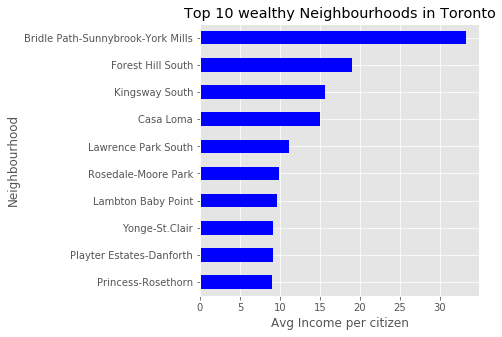

In [15]:
df.plot(kind='barh', figsize=(5, 5), rot=0, color='b') 

plt.xlabel('Avg Income per citizen')
plt.ylabel('Neighbourhood')
plt.title('Top 10 wealthy Neighbourhoods in Toronto')


plt.show()

#### Now checking for number of venues in each **Top10** neighbourhood using *FOURSQUARE*

In [16]:
import requests # library to handle requests
import pandas as pd # library for data analsysis
import numpy as np # library to handle data in a vectorized manner
import random # library for random number generation

# tranforming json file into a pandas dataframe library
from pandas.io.json import json_normalize

In [17]:
CLIENT_ID = 'UNRIHB1SZKGRFKXW2Z0GRUOKXUZMRIDO32HZVBXS0KP1K4UZ'
CLIENT_SECRET = 'X34YJV5QJGBOIJBMRLR4MKUPDCBY5FVLCYILMH4LNNAQMXLO'
VERSION = '20180604'
LIMIT = 100


latitude = 43.665961
longitude = -79.545939

search_query = 'cinema'
radius = 5000

url = 'https://api.foursquare.com/v2/venues/search?client_id={}&client_secret={}&ll={},{}&v={}&query={}&radius={}&limit={}'.format(CLIENT_ID, CLIENT_SECRET, latitude, longitude, VERSION, search_query, radius, LIMIT)

results = requests.get(url).json()
results

{'meta': {'code': 200, 'requestId': '5e3424a99fcb92001b188dd2'},
 'response': {'venues': [{'id': '4fa6a383e4b0e4baa3899fcb',
    'name': 'Kumari Photo Cinema Studio',
    'location': {'address': "223 St.John's Rd",
     'crossStreet': 'Runnymeade',
     'lat': 43.664058685302734,
     'lng': -79.4796142578125,
     'labeledLatLngs': [{'label': 'display',
       'lat': 43.664058685302734,
       'lng': -79.4796142578125}],
     'distance': 5345,
     'cc': 'CA',
     'city': 'Toronto',
     'state': 'ON',
     'country': 'Canada',
     'formattedAddress': ["223 St.John's Rd (Runnymeade)",
      'Toronto ON',
      'Canada']},
    'categories': [{'id': '4bf58dd8d48988d1f4941735',
      'name': 'Design Studio',
      'pluralName': 'Design Studios',
      'shortName': 'Design',
      'icon': {'prefix': 'https://ss3.4sqi.net/img/categories_v2/shops/design_',
       'suffix': '.png'},
      'primary': True}],
    'referralId': 'v-1580475541',
    'hasPerk': False},
   {'id': '509ad64191d4776

In [18]:
venues = results['response']['venues']

# tranform venues into a dataframe
dataframe = json_normalize(venues)
dataframe.count()
print('The number of venues in this area is: ', dataframe['name'].count())

The number of venues in this area is:  4


In [19]:
df = pd.DataFrame(df)
df.sort_values(by='Avg Income per citizen', ascending=False, inplace=True)
df.head(20)

,Avg Income per citizen
Bridle Path-Sunnybrook-York Mills,33.240881
Forest Hill South,19.057119
Kingsway South,15.601553
Casa Loma,15.048049
Lawrence Park South,11.147177
Rosedale-Moore Park,9.936577
Lambton Baby Point,9.596619
Yonge-St.Clair,9.113506
Playter Estates-Danforth,9.076243
Princess-Rosethorn,8.963442


#### Append details about number of venues in each Neighbourhood

In [20]:
df['Nr of venues'] = [15,35,18,44,14,40,13,40,40,4]
df.head(20)

,Avg Income per citizen,Nr of venues
Bridle Path-Sunnybrook-York Mills,33.240881,15
Forest Hill South,19.057119,35
Kingsway South,15.601553,18
Casa Loma,15.048049,44
Lawrence Park South,11.147177,14
Rosedale-Moore Park,9.936577,40
Lambton Baby Point,9.596619,13
Yonge-St.Clair,9.113506,40
Playter Estates-Danforth,9.076243,40
Princess-Rosethorn,8.963442,4


Text(0.5, 1.0, 'Top 10 wealthy Neighbourhoods in Toronto')

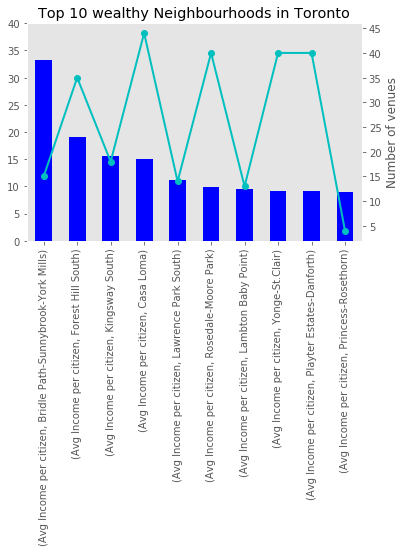

In [21]:
fig = plt.figure()
ax = df[['Avg Income per citizen']].unstack().plot(kind='bar', use_index=True, color='b')
ax.set_ylim((0, 40.))
ax.grid(None)
ax2 = ax.twinx()
ax2.plot(ax.get_xticks(), df[['Nr of venues']].values, linestyle='-', marker='o', linewidth=2.0, color='c')
ax2.grid(None)

plt.xlabel('Neighbourhood')
plt.ylabel('Number of venues')
plt.title('Top 10 wealthy Neighbourhoods in Toronto')

### Repeating the same process for **Bottom10** neighbourhoods

In [22]:
Toronto_df.sort_values(by=['Avg Income per citizen'], ascending=True, inplace=True)
Toronto_df.head(10)

,Population in 2016,Income in 2016,Avg Income per citizen
Woburn,53.485,30.878,0.577321
Malvern,43.794,29.573,0.675275
L'Amoreaux,43.993,31.826,0.723433
Mount Olive-Silverstone-Jamestown,32.954,26.548,0.805608
Rouge,46.496,39.556,0.850740
Willowdale East,50.434,45.326,0.898719
Glenfield-Jane Heights,30.491,27.984,0.917779
West Humber-Clairville,33.312,31.771,0.953740
Downsview-Roding-CFB,35.052,34.168,0.974780
Agincourt North,29.113,30.414,1.044688


In [23]:
df_chart = Toronto_df['Avg Income per citizen']
df2 = df_chart.head(10)
df2.sort_values(ascending=False, inplace=True)
df2.head()

Agincourt North           1.044688
Downsview-Roding-CFB      0.974780
West Humber-Clairville    0.953740
Glenfield-Jane Heights    0.917779
Willowdale East           0.898719
Name: Avg Income per citizen, dtype: float64

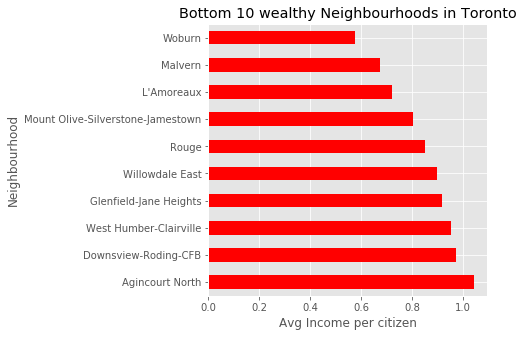

In [24]:
df2.plot(kind='barh', figsize=(5, 5), rot=0, color='r') 

plt.xlabel('Avg Income per citizen')
plt.ylabel('Neighbourhood')
plt.title('Bottom 10 wealthy Neighbourhoods in Toronto')


plt.show()

In [25]:
CLIENT_ID = 'UNRIHB1SZKGRFKXW2Z0GRUOKXUZMRIDO32HZVBXS0KP1K4UZ'
CLIENT_SECRET = 'X34YJV5QJGBOIJBMRLR4MKUPDCBY5FVLCYILMH4LNNAQMXLO'
VERSION = '20180604'
LIMIT = 100


latitude = 43.808043
longitude = -79.266454

search_query = 'cinema'
radius = 5000

url = 'https://api.foursquare.com/v2/venues/search?client_id={}&client_secret={}&ll={},{}&v={}&query={}&radius={}&limit={}'.format(CLIENT_ID, CLIENT_SECRET, latitude, longitude, VERSION, search_query, radius, LIMIT)

results = requests.get(url).json()
#results

In [26]:
venues = results['response']['venues']

# tranform venues into a dataframe
dataframe = json_normalize(venues)
dataframe.count()
print('The number of venues in this area is: ', dataframe['name'].count())

The number of venues in this area is:  4


In [27]:
df2 = pd.DataFrame(df2)
df2.sort_values(by='Avg Income per citizen', ascending=True, inplace=True)
df2.head(20)

,Avg Income per citizen
Woburn,0.577321
Malvern,0.675275
L'Amoreaux,0.723433
Mount Olive-Silverstone-Jamestown,0.805608
Rouge,0.850740
Willowdale East,0.898719
Glenfield-Jane Heights,0.917779
West Humber-Clairville,0.953740
Downsview-Roding-CFB,0.974780
Agincourt North,1.044688


In [28]:
df2['Nr of venues'] = [5,5,5,3,2,3,9,3,3,4]
df2.head(20)

,Avg Income per citizen,Nr of venues
Woburn,0.577321,5
Malvern,0.675275,5
L'Amoreaux,0.723433,5
Mount Olive-Silverstone-Jamestown,0.805608,3
Rouge,0.850740,2
Willowdale East,0.898719,3
Glenfield-Jane Heights,0.917779,9
West Humber-Clairville,0.953740,3
Downsview-Roding-CFB,0.974780,3
Agincourt North,1.044688,4


Text(0.5, 1.0, 'Bottom 10 wealthy Neighbourhoods in Toronto')

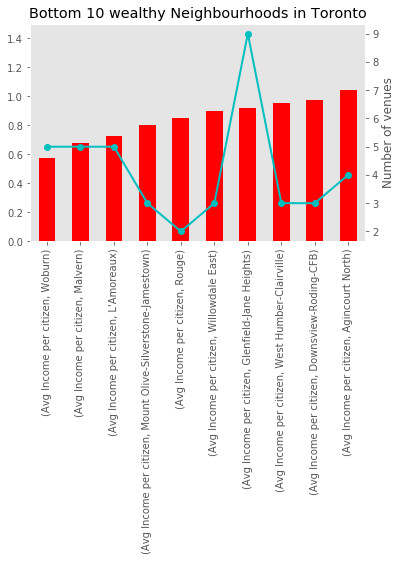

In [29]:
fig = plt.figure()
ax = df2[['Avg Income per citizen']].unstack().plot(kind='bar', use_index=True, color='r')
ax.set_ylim((0, 1.5))
ax.grid(None)
ax2 = ax.twinx()
ax2.plot(ax.get_xticks(), df2[['Nr of venues']].values, linestyle='-', marker='o', linewidth=2.0, color='c')
ax2.grid(None)

plt.xlabel('Neighbourhood')
plt.ylabel('Number of venues')
plt.title('Bottom 10 wealthy Neighbourhoods in Toronto')

In [31]:
print('The average number of venues for Top 10 neighbourhoods are:', df['Nr of venues'].mean())
print('The average number of venues for Bottom 10 neighbourhoods are:', df2['Nr of venues'].mean())

The average number of venues for Top 10 neighbourhoods are: 26.3
The average number of venues for Bottom 10 neighbourhoods are: 4.2
